<a href="https://www.kaggle.com/code/rajashreerd/australia-rainfall?scriptVersionId=106746931" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Data Description

* 1. Location - Name of the city from Australia.
* 2. MinTemp - The Minimum temperature during a particular day. (degree Celsius)
* 3. MaxTemp - The maximum temperature during a particular day. (degree Celsius)
* 4. Rainfall - Rainfall during a particular day. (millimeters)
* 5. Evaporation - Evaporation during a particular day. (millimeters)
* 6. Sunshine - Bright sunshine during a particular day. (hours)
* 7. WindGusDir - The direction of the strongest gust during a particular day. (16 compass points)
* 8. WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)
* 9. WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)
* 10. WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)
* 11. WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)
* 12. WindSpeed3pm - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)
* 13. Humidity9am - The humidity of the wind at 9 am. (percent)
* 14. Humidity3pm - The humidity of the wind at 3 pm. (percent)
* 15. Pressure9am - Atmospheric pressure at 9 am. (hectopascals)
* 16. Pressure3pm - Atmospheric pressure at 3 pm. (hectopascals)
* 17. Cloud9am - Cloud-obscured portions of the sky at 9 am. (eighths)
* 18. Cloud3pm - Cloud-obscured portions of the sky at 3 pm. (eighths)
* 19. Temp9am - The temperature at 9 am. (degree Celsius)
* 20. Temp3pm - The temperature at 3 pm. (degree Celsius)
* 21. RainToday - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.
* 22. RainTomorrow - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).

In [1]:
# Import the tools we need

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#! pip install xgboost

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/australia-weather-data/Weather Training Data.csv
/kaggle/input/australia-weather-data/Weather Test Data.csv


In [4]:
# Load Data
df = pd.read_csv("../input/australia-weather-data/Weather Training Data.csv")
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
row ID,Row0,Row1,Row2,Row3,Row4,Row5,Row6,Row7,Row8,Row9,Row10,Row11,Row12,Row13,Row14
Location,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,17.5,14.6,7.7,13.1,13.4,15.9,12.6,9.8,14.1,13.5,11.2,9.8,17.1
MaxTemp,22.9,25.1,32.3,29.7,26.7,30.1,30.4,21.7,21.0,27.7,20.9,22.9,22.5,25.6,33.0
Rainfall,0.6,0.0,1.0,0.2,0.0,1.4,0.0,2.2,3.6,NaN,0.0,16.8,10.6,0.0,0.0
Evaporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,W,WNW,W,W,N,NNE,SW,WNW,ENE,W,SSE,SSE,NE
WindGustSpeed,44.0,44.0,41.0,56.0,35.0,28.0,30.0,31.0,44.0,50.0,22.0,63.0,43.0,26.0,43.0
WindDir9am,W,NNW,ENE,W,SSE,S,SSE,NE,W,NaN,SSW,N,WSW,SE,NE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [6]:
df.shape

(99516, 23)

In [7]:
pd.crosstab(df.MaxTemp, df.RainTomorrow).head()

RainTomorrow,0,1
MaxTemp,,
-4.1,0,1
-3.8,0,1
-3.7,0,1
-3.2,1,0
-3.1,0,1


In [8]:
pd.crosstab(df.Location, df.RainTomorrow).head()

RainTomorrow,0,1
Location,,
Adelaide,1675,503
Albany,1452,599
Albury,1699,443
AliceSprings,1948,171
BadgerysCreek,1641,400


Some of our data is in string datatype. We need to convert it to numbers.

In [9]:
# Checking which features are in non-numeric 
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

row ID
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday


In [10]:
# Converting to numeric dtype
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [11]:
df.dtypes

row ID           category
Location         category
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday        category
RainTomorrow        int64
dtype: object

In [12]:
df.Location.cat.codes.head()

0    2
1    2
2    2
3    2
4    2
dtype: int8

The string columns has been converted to category dtype. It has basically assigned a numerical value to each category, under the hood. So now we can treat these columns and its content as numbers.

In [13]:
# Checking if data is missing 
df.isna().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [14]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
row ID,Row0,Row1,Row2,Row3,Row4,Row5,Row6,Row7,Row8,Row9,Row10,Row11,Row12,Row13,Row14
Location,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,17.5,14.6,7.7,13.1,13.4,15.9,12.6,9.8,14.1,13.5,11.2,9.8,17.1
MaxTemp,22.9,25.1,32.3,29.7,26.7,30.1,30.4,21.7,21.0,27.7,20.9,22.9,22.5,25.6,33.0
Rainfall,0.6,0.0,1.0,0.2,0.0,1.4,0.0,2.2,3.6,NaN,0.0,16.8,10.6,0.0,0.0
Evaporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,W,WNW,W,W,N,NNE,SW,WNW,ENE,W,SSE,SSE,NE
WindGustSpeed,44.0,44.0,41.0,56.0,35.0,28.0,30.0,31.0,44.0,50.0,22.0,63.0,43.0,26.0,43.0
WindDir9am,W,NNW,ENE,W,SSE,S,SSE,NE,W,NaN,SSW,N,WSW,SE,NE


Yes. The dataset has missing values. So we are going to fill the missing values.

In [15]:
# Check columns which are numeric and has null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


We can fill these empty numeric rows with median.

In [16]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing data
            df[label] = content.fillna(content.median())

In [17]:
# Chcek if there is any null numeric values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

There are no null numeric values. Filling and turning categorical variables into numbers.

In [18]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

WindGustDir
WindDir9am
WindDir3pm
RainToday


Trying to the null values in the above rows.

In [19]:
df["WindGustDir"].unique

<bound method Series.unique of 0          W
1        WNW
2          W
3        WNW
4          W
        ... 
99511    ESE
99512      E
99513      E
99514    NNW
99515      N
Name: WindGustDir, Length: 99516, dtype: category
Categories (16, object): ['E' < 'ENE' < 'ESE' < 'N' ... 'SW' < 'W' < 'WNW' < 'WSW']>

In [20]:
df["RainToday"].unique

<bound method Series.unique of 0        No
1        No
2        No
3        No
4        No
         ..
99511    No
99512    No
99513    No
99514    No
99515    No
Name: RainToday, Length: 99516, dtype: category
Categories (2, object): ['No' < 'Yes']>

In [21]:
num_na=df['WindGustDir'].isna().sum()
df.loc[df.WindGustDir.isna(),"WindGustDir"]=random.choices(['W','WNW','N','NNE','SW','ENE','SSE','NE','WSW','NNW','S','ESE','NW','E','SSW','SE'], k=num_na)

In [22]:
wind_dir_na=df['WindDir9am'].isna().sum()
df.loc[df.WindDir9am.isna(),"WindDir9am"]=random.choices(['W','NNW','ENE','SSE','S','NE','SSW','N','WSW','SE','ESE','E','NW','NNE','SW','WNW'], k=wind_dir_na)

In [23]:
wind_dir_three_na=df['WindDir3pm'].isna().sum()
df.loc[df.WindDir3pm.isna(),"WindDir3pm"]=random.choices(['WNW','WSW','NW','W','SSE','ESE','ENE','SSW','E','SW','NNW','N','S','SE','NNE','NE'], k=wind_dir_three_na)

In [24]:
rain_today_na=df['RainToday'].isna().sum()
df.loc[df.RainToday.isna(),"RainToday"]=random.choices(['No','Yes'], k=rain_today_na)

In [25]:
# Check if there is anymore missing data
df.isna().sum()

row ID           0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now we have got no missing data in our columns and all of our data is numeric.

In [26]:
sns.set(font_scale = 1.2)
def plot_and_stats(data,col):
    print(data[col].mean())
    print(data[col].median())
    
    fig = plt.figure(figsize=[15, 6])


    plt.subplot(1,2,1)
    sns.histplot(data=data, x=col,kde='true')
    plt.title("Mean")

    plt.subplot(1,2,2)
    sns.histplot(x=col, data=data)
    plt.title("Median")

    plt.show()

23.217083685035572
22.6


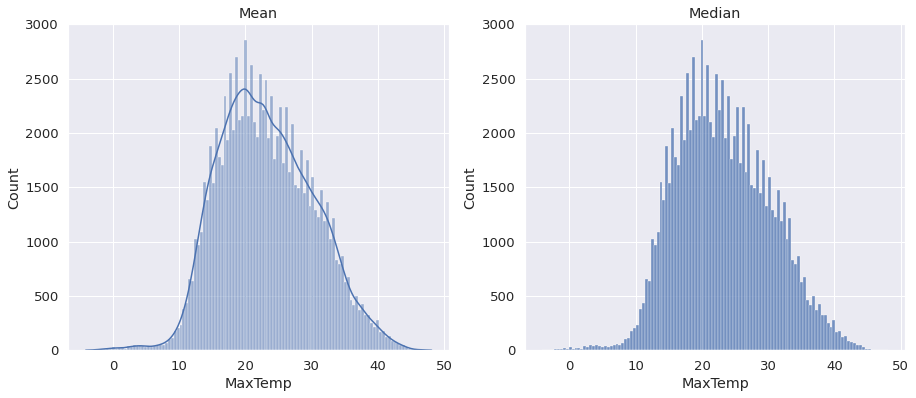

In [27]:
plot_and_stats(df, 'MaxTemp');

2.3298755978938064
0.0


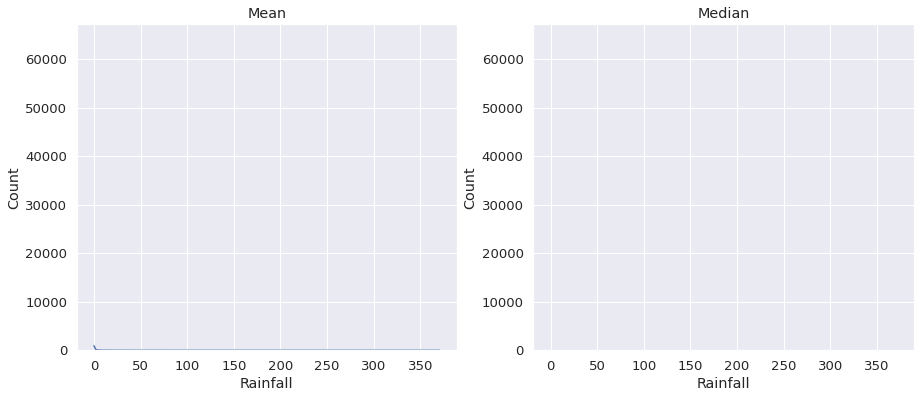

In [28]:
plot_and_stats(df, 'Rainfall');

5.178685839463
4.8


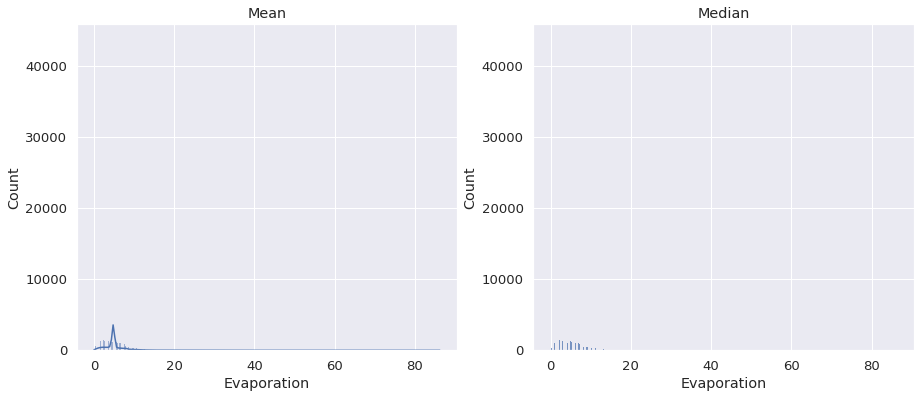

In [29]:
plot_and_stats(df, 'Evaporation');

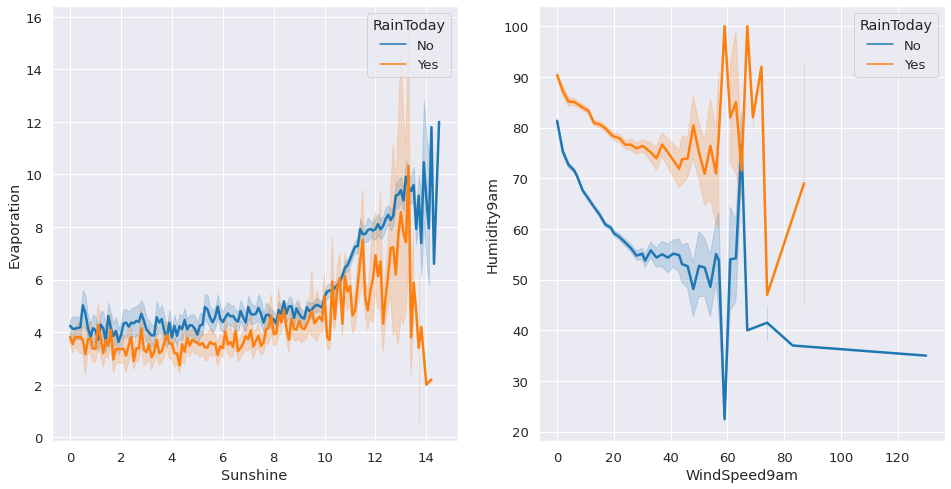

In [30]:
fig = plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.lineplot(x="Sunshine",y="Evaporation",hue="RainToday",data=df, palette="tab10", linewidth=2.5)
plt.subplot(1,2,2)
sns.lineplot(x="WindSpeed9am",y="Humidity9am",hue="RainToday",data=df, palette="tab10", linewidth=2.5)
plt.show()

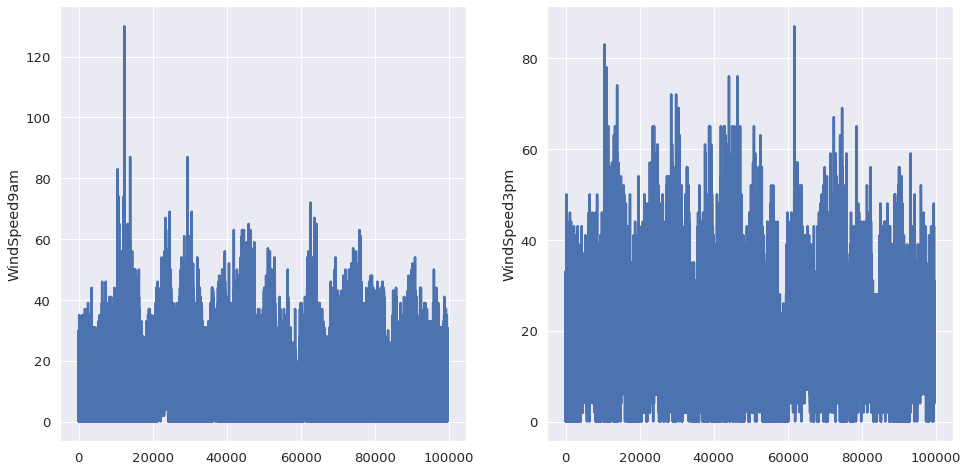

In [31]:
fig = plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.lineplot(data = df["WindSpeed9am"], palette="tab10", linewidth=2.5)
plt.subplot(1,2,2)
sns.lineplot(data = df["WindSpeed3pm"], palette="tab10", linewidth=2.5)
plt.show()

In [32]:
# Make a correlation matrix
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.734426,0.103195,0.371953,0.034238,0.174264,0.177211,0.172693,-0.235352,0.004478,-0.426344,-0.436021,0.038812,-0.002549,0.898419,0.700083,0.084283
MaxTemp,0.734426,1.000000,-0.073272,0.456160,0.317898,0.070428,0.018160,0.050366,-0.501884,-0.500240,-0.312112,-0.400023,-0.235095,-0.219365,0.880475,0.969255,-0.159418
Rainfall,0.103195,-0.073272,1.000000,-0.042732,-0.169965,0.127128,0.086886,0.059935,0.219381,0.248145,-0.158121,-0.118961,0.163492,0.137317,0.011615,-0.077631,0.234603
Evaporation,0.371953,0.456160,-0.042732,1.000000,0.283673,0.153174,0.151973,0.099995,-0.390936,-0.299077,-0.219422,-0.239795,-0.174877,-0.161345,0.433244,0.442518,-0.087342
Sunshine,0.034238,0.317898,-0.169965,0.283673,1.000000,-0.026508,-0.007986,0.025284,-0.332381,-0.433698,0.032959,-0.012212,-0.509821,-0.530869,0.192625,0.333755,-0.324472
WindGustSpeed,0.174264,0.070428,0.127128,0.153174,-0.026508,1.000000,0.580049,0.659395,-0.213636,-0.028974,-0.428559,-0.387102,0.044060,0.071561,0.149518,0.035615,0.224989
WindSpeed9am,0.177211,0.018160,0.086886,0.151973,-0.007986,0.580049,1.000000,0.511056,-0.272426,-0.031433,-0.216574,-0.166739,0.004797,0.027688,0.131669,0.008057,0.090667
WindSpeed3pm,0.172693,0.050366,0.059935,0.099995,0.025284,0.659395,0.511056,1.000000,-0.144415,0.015382,-0.278000,-0.239963,0.032955,0.011937,0.161370,0.028053,0.087988
Humidity9am,-0.235352,-0.501884,0.219381,-0.390936,-0.332381,-0.213636,-0.272426,-0.144415,1.000000,0.658766,0.134725,0.179104,0.354885,0.276159,-0.473445,-0.494365,0.254116
Humidity3pm,0.004478,-0.500240,0.248145,-0.299077,-0.433698,-0.028974,-0.031433,0.015382,0.658766,1.000000,-0.022841,0.050728,0.395755,0.402547,-0.218447,-0.556343,0.438711


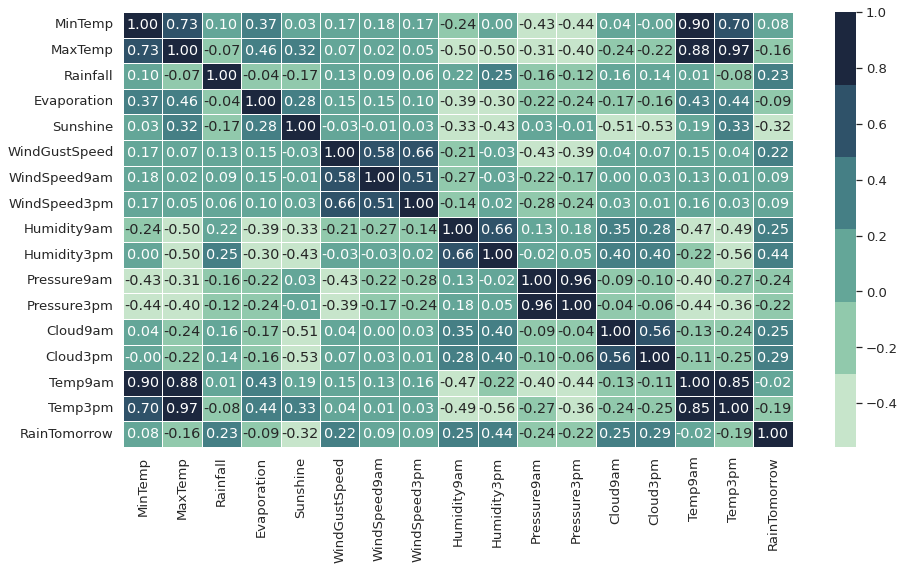

In [33]:
# Let's visualize it more
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt = ".2f",
                 cmap = sns.cubehelix_palette(rot=-.4));

Since Pressure9am and Temp3pm is correlated more than 90% with other independent variable, we need tp drop them.

In [34]:
cols_drop = ["Pressure9am", "Temp3pm"]
df.drop(cols_drop, axis = 1, inplace = True)
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,20.0,24.0,71.0,22.0,1007.1,8.0,5.0,16.9,No,0
1,Row1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,4.0,22.0,44.0,25.0,1007.8,5.0,5.0,17.2,No,0
2,Row2,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,7.0,20.0,82.0,33.0,1006.0,7.0,8.0,17.8,No,0
3,Row3,Albury,14.6,29.7,0.2,4.8,8.4,WNW,56.0,W,...,19.0,24.0,55.0,23.0,1005.4,5.0,5.0,20.6,No,0
4,Row4,Albury,7.7,26.7,0.0,4.8,8.4,W,35.0,SSE,...,6.0,17.0,48.0,19.0,1010.1,5.0,5.0,16.3,No,0


In [35]:
df.head().T

,0,1,2,3,4
row ID,Row0,Row1,Row2,Row3,Row4
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,17.5,14.6,7.7
MaxTemp,22.9,25.1,32.3,29.7,26.7
Rainfall,0.6,0.0,1.0,0.2,0.0
Evaporation,4.8,4.8,4.8,4.8,4.8
Sunshine,8.4,8.4,8.4,8.4,8.4
WindGustDir,W,WNW,W,WNW,W
WindGustSpeed,44.0,44.0,41.0,56.0,35.0
WindDir9am,W,NNW,ENE,W,SSE


In [36]:
le = LabelEncoder()

# Let's make a function
def label_encoding_df_cols (col_name, encoder, data_frame):
    print("Unique values:", data_frame[col_name].unique())
    print("Unique value counts:", data_frame[col_name].value_counts())
    encoder.fit(data_frame[col_name]);
    transform_encode = encoder.transform(data_frame[col_name])
    data_frame[col_name] = transform_encode
    
    return label_encoding_df_cols

In [37]:
label_encoding_df_cols('WindGustDir', le ,df)

Unique values: ['W', 'WNW', 'N', 'NNE', 'SW', ..., 'ESE', 'NW', 'E', 'SSW', 'SE']
Length: 16
Categories (16, object): ['E' < 'ENE' < 'ESE' < 'N' ... 'SW' < 'W' < 'WNW' < 'WSW']
Unique value counts: W      7281
SE     6900
E      6770
SSE    6755
N      6742
S      6616
SW     6604
WSW    6531
SSW    6440
NW     6050
WNW    6034
ENE    5956
ESE    5478
NE     5392
NNW    5001
NNE    4966
Name: WindGustDir, dtype: int64


<function __main__.label_encoding_df_cols(col_name, encoder, data_frame)>

In [38]:
label_encoding_df_cols('WindDir9am', le ,df)

Unique values: ['W', 'NNW', 'ENE', 'SSE', 'S', ..., 'E', 'SW', 'NW', 'NNE', 'WNW']
Length: 16
Categories (16, object): ['E' < 'ENE' < 'ESE' < 'N' ... 'SW' < 'W' < 'WNW' < 'WSW']
Unique value counts: N      8471
E      6769
SE     6728
SSE    6693
S      6452
NW     6418
W      6217
SW     6204
NNE    6042
NNW    5898
ENE    5784
NE     5754
ESE    5740
SSW    5635
WNW    5464
WSW    5247
Name: WindDir9am, dtype: int64


<function __main__.label_encoding_df_cols(col_name, encoder, data_frame)>

In [39]:
label_encoding_df_cols('WindDir3pm', le ,df)

Unique values: ['WNW', 'WSW', 'NW', 'W', 'SSE', ..., 'N', 'S', 'NNE', 'SE', 'NE']
Length: 16
Categories (16, object): ['E' < 'ENE' < 'ESE' < 'N' ... 'SW' < 'W' < 'WNW' < 'WSW']
Unique value counts: SE     7566
W      7064
S      6809
WSW    6785
SW     6626
SSE    6552
N      6248
WNW    6209
NW     6094
E      6016
ESE    6009
NE     5888
SSW    5734
NNW    5600
ENE    5572
NNE    4744
Name: WindDir3pm, dtype: int64


<function __main__.label_encoding_df_cols(col_name, encoder, data_frame)>

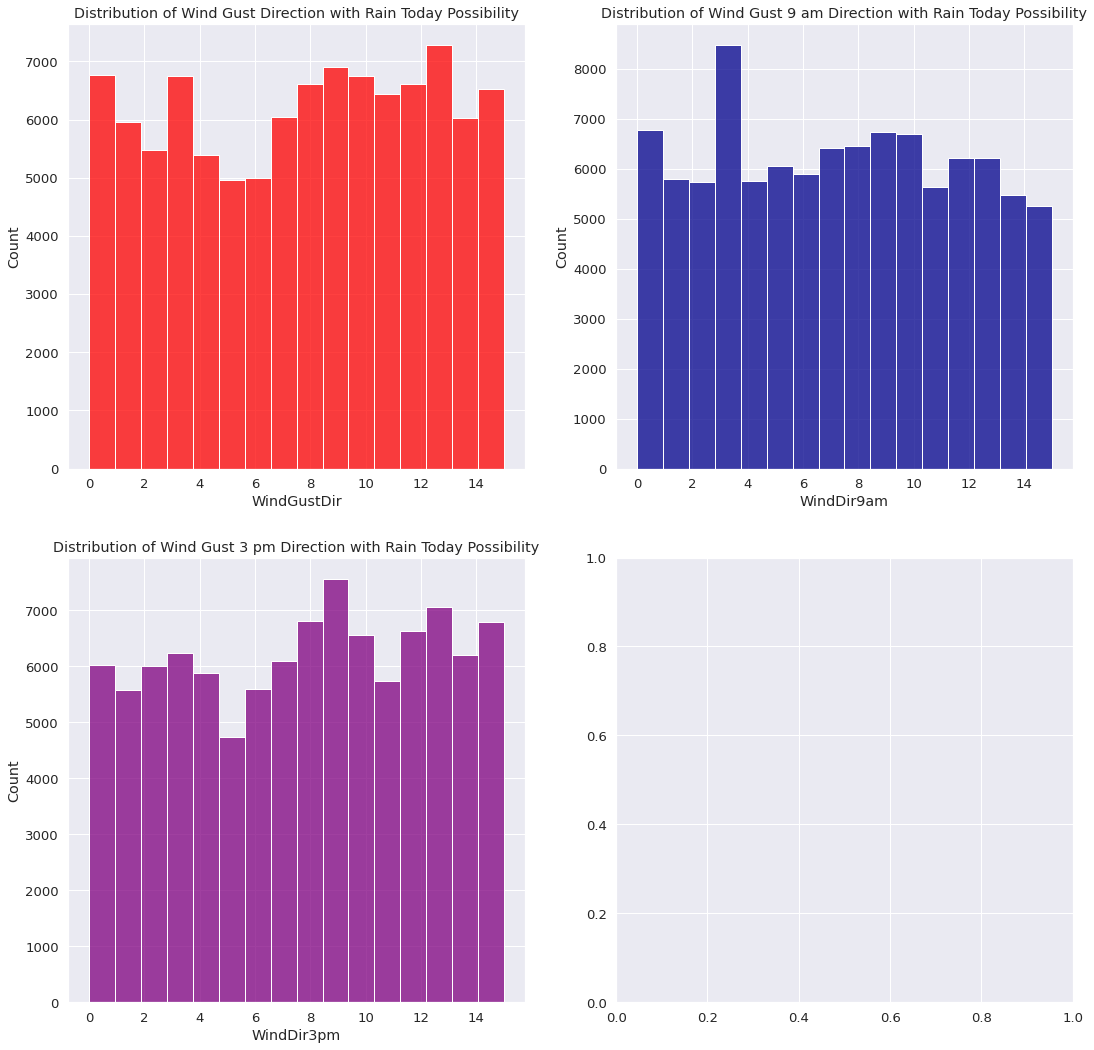

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(18,18))

ax = sns.histplot(ax = axs[0,0],
                 data = df["WindGustDir"],
                 legend = ('WNW','WSW','NW','W','SSE','ESE','ENE','SSW','E','SW','NNW','N','S','SE','NNE','NE'),
                 bins= len(df['WindGustDir'].unique()),
                 color = ["Red"]);
                 #kind = "hist",
                 #hue ="RainTomorrow");   

ax = sns.histplot(ax = axs [0,1],
                 data = df["WindDir9am"], 
                 bins= len(df['WindDir9am'].unique()),
                 color = ["DarkBlue"]);
                 #kind = "hist",
                 #hue = "RainTomorrow");
                 
ax = sns.histplot(ax = axs [1,0],
                 data = df["WindDir3pm"], 
                 bins= len(df['WindDir3pm'].unique()),
                 color = ["Purple"]);
                 #kind = "hist",
                 #hue = "RainTomorrow");

                     
axs[0,0].set_title('Distribution of Wind Gust Direction with Rain Today Possibility');
axs[0,1].set_title('Distribution of Wind Gust 9 am Direction with Rain Today Possibility');
axs[1,0].set_title('Distribution of Wind Gust 3 pm Direction with Rain Today Possibility');
# axs[1,1].set_title('Distribution of Wind Gust Speed with Rain Today Possibility')

In [41]:
label_encoding_df_cols('Location', le ,df)

Unique values: ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', ..., 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']
Length: 49
Categories (49, object): ['Adelaide' < 'Albany' < 'Albury' < 'AliceSprings' ... 'Williamtown' < 'Witchcliffe' < 'Wollongong' < 'Woomera']
Unique value counts: Canberra            2393
Sydney              2361
Perth               2262
Hobart              2239
Darwin              2217
Brisbane            2202
Adelaide            2178
PerthAirport        2167
Albury              2142
MountGambier        2140
MelbourneAirport    2139
Mildura             2124
Ballarat            2122
AliceSprings        2119
Portland            2113
Watsonia            2113
Nuriootpa           2110
Bendigo             2110
Townsville          2106
Cairns              2101
SydneyAirport       2100
Tuggeranong         2099
Newcastle           2096
Sale                2093
Wollongong          2090
Cobar               2090
Launceston          2072
WaggaWagga 

<function __main__.label_encoding_df_cols(col_name, encoder, data_frame)>

In [42]:
df["new_column"] = pd.get_dummies(df["RainToday"], drop_first = True)

In [43]:
df.rename({"new_column" : "Rain_Today"}, axis = 1, inplace = True)

In [44]:
df.drop("RainToday", axis = 1, inplace = True)

In [45]:
df["Rain_Today"].unique()

array([0, 1], dtype=uint8)

In [46]:
# Dropping RowID
df.drop("row ID", axis = 1, inplace = True)

In [47]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Location,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
MinTemp,13.4,7.4,17.5,14.6,7.7,13.1,13.4,15.9,12.6,9.8,14.1,13.5,11.2,9.8,17.1
MaxTemp,22.9,25.1,32.3,29.7,26.7,30.1,30.4,21.7,21.0,27.7,20.9,22.9,22.5,25.6,33.0
Rainfall,0.6,0.0,1.0,0.2,0.0,1.4,0.0,2.2,3.6,0.0,0.0,16.8,10.6,0.0,0.0
Evaporation,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8
Sunshine,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4
WindGustDir,13.0,14.0,13.0,14.0,13.0,13.0,3.0,5.0,12.0,14.0,1.0,13.0,10.0,10.0,4.0
WindGustSpeed,44.0,44.0,41.0,56.0,35.0,28.0,30.0,31.0,44.0,50.0,22.0,63.0,43.0,26.0,43.0
WindDir9am,13.0,6.0,1.0,13.0,10.0,8.0,10.0,4.0,13.0,1.0,11.0,3.0,15.0,9.0,4.0
WindDir3pm,14.0,15.0,7.0,13.0,13.0,10.0,2.0,1.0,11.0,14.0,0.0,14.0,12.0,6.0,3.0


Our data is ready for modelling.

## Modelling

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  int64  
 1   MinTemp        99516 non-null  float64
 2   MaxTemp        99516 non-null  float64
 3   Rainfall       99516 non-null  float64
 4   Evaporation    99516 non-null  float64
 5   Sunshine       99516 non-null  float64
 6   WindGustDir    99516 non-null  int64  
 7   WindGustSpeed  99516 non-null  float64
 8   WindDir9am     99516 non-null  int64  
 9   WindDir3pm     99516 non-null  int64  
 10  WindSpeed9am   99516 non-null  float64
 11  WindSpeed3pm   99516 non-null  float64
 12  Humidity9am    99516 non-null  float64
 13  Humidity3pm    99516 non-null  float64
 14  Pressure3pm    99516 non-null  float64
 15  Cloud9am       99516 non-null  float64
 16  Cloud3pm       99516 non-null  float64
 17  Temp9am        99516 non-null  float64
 18  RainTo

In [49]:
# Split data into x and y
x = df.drop("Rain_Today", axis = 1)
y = df["Rain_Today"]

# Set random seed
np.random.seed(42)

# Split data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3)

In [50]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((69661, 19), (29855, 19), (69661,), (29855,))

Now we've got our data into training and validation sets. Let's build a model. 

We are going to train our data in these models:

1. Random Forest Classifier
2. Logistic Regression
3. KNeighbors Classifier
4. GaussianNB
5. DecisionTree Classifier
6. XGBClassifier

In [51]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

#--------tranform value for valid data-------#
x_valid = scaler.transform(x_valid)

In [52]:
models = {"Random Forest Classifier" : RandomForestClassifier(),
          "Logistic Regression" : LogisticRegression(max_iter = 200),
          "KNeighbors Classifier" : KNeighborsClassifier(),
          "GaussianNB" : GaussianNB(),
          "DesicisonTree Classifier" : DecisionTreeClassifier(),
          "XGB Classifier" : XGBClassifier()}

In [53]:
import time
def fit_and_score (models, x_train, x_valid, y_train, y_valid):
    """
    Fits and evaluates the given models.
    """
    
    # Set random seed
    np.random.seed(42)
    
    # Set empty dictionary
    model_scores = {}
    
    # Loop through models
    for names, model in models.items():
        
        # Fit the model
        model.fit(x_train, y_train)
    
        
        # Evaluate the model and append the score to model_scores
        model_scores[names] = model.score(x_valid, y_valid)
        
    return model_scores

In [54]:
model_score = fit_and_score(models = models,
                             x_train = x_train,
                             x_valid = x_valid,
                             y_train = y_train,
                             y_valid = y_valid)
model_score

{'Random Forest Classifier': 0.9951431920951265,
 'Logistic Regression': 0.8874895327415844,
 'KNeighbors Classifier': 0.8111539105677441,
 'GaussianNB': 0.945771227600067,
 'DesicisonTree Classifier': 0.9898174510132306,
 'XGB Classifier': 0.9950762016412661}

In [55]:
model_table = pd.DataFrame(model_score, index = ["Scores"])
model_table.T

,Scores
Random Forest Classifier,0.995143
Logistic Regression,0.887490
KNeighbors Classifier,0.811154
GaussianNB,0.945771
DesicisonTree Classifier,0.989817
XGB Classifier,0.995076


After scoring our model, we can see that `RandomForestClassifier()`, `DesicisonTreeClassifier()` and `XGB Classifier()` seems to overfitting. Whereas, `LogictisRegression()` and `KneighborsClassifier()` is underfitting. `GaussianNB()` has got an ideal scoring for us to test it in our test data.

## Model Comparison

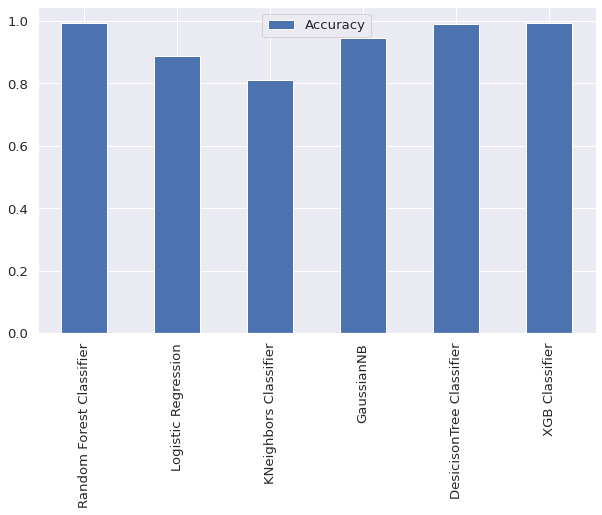

In [56]:
model_compare = pd.DataFrame(model_score, index = ["Accuracy"])
model_compare.T.plot.bar(figsize = (10, 6));

In [57]:
# Create a hyperparameter grid for GaussianNB()
gs_NB_grid = {"var_smoothing" : np.logspace(0,-9, num=100)}

# Let's try RndomizedSearchCV on GaussianNB
rs_NB_gs = RandomizedSearchCV(GaussianNB(), 
                 param_distributions = gs_NB_grid, 
                 cv = 5,
                 verbose=1,
                 n_iter = 20,
                 random_state = 42)
rs_NB_gs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, verbose=1)

In [58]:
rs_NB_gs.best_params_

{'var_smoothing': 4.3287612810830526e-07}

In [59]:
rs_NB_gs.score(x_valid, y_valid)

0.94845084575448

In [60]:
rs_NB_gs.best_params_

{'var_smoothing': 4.3287612810830526e-07}

In [61]:
rs_NB_gs.score(x_valid, y_valid)

0.94845084575448

In [62]:
ideal_model = rs_NB_gs.predict(x_valid)
def evaluate_preds (y_valid, y_preds):
    """
    Performs evaluation comparison on y_test labels and y_preds labels on our classification model.
    """
    accuracy = accuracy_score(y_valid, y_preds)
    precision = precision_score(y_valid, y_preds)
    recall = recall_score(y_valid, y_preds)
    f1 = f1_score(y_valid, y_preds)
    
    metric_dict = {"accuracy" : round(accuracy, 2),
                   "precision" : round(precision, 2),
                   "recall" : round(recall, 2),
                   "f1" : round(f1, 2)} 
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [63]:
y_preds = rs_NB_gs.predict(x_valid)
gs_metrics = evaluate_preds(y_valid, y_preds)

Accuracy: 94.85%
Precision: 0.83
Recall: 0.98
F1: 0.90


In [64]:
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     22971
           1       0.83      0.98      0.90      6884

    accuracy                           0.95     29855
   macro avg       0.91      0.96      0.93     29855
weighted avg       0.96      0.95      0.95     29855



### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


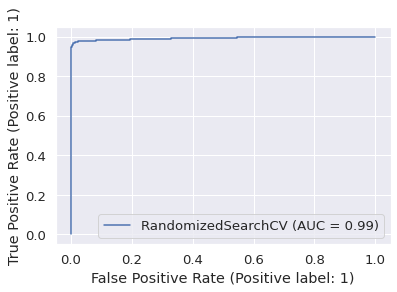

In [65]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_NB_gs, x_valid, y_valid);

In [66]:
# Confusion matrix
print(confusion_matrix(y_valid, y_preds))

[[21570  1401]
 [  138  6746]]


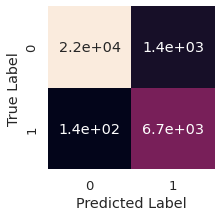

In [67]:
# Improve visualization for confusion matrix
sns.set(font_scale = 1.2)
def plot_conf_mat(y_valid, y_preds):
    """
    Plots a confusion matrix using seaborn's heatmap.
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_valid, y_preds),
                     annot = True,
                     cbar = False)
            
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
plot_conf_mat(y_valid, y_preds);

## Predictions on test data

In [68]:
# Import test data
df_test = pd.read_csv("/kaggle/input/australia-weather-data/Weather Test Data.csv")
df_test.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42483 non-null  float64
 3   MaxTemp        42585 non-null  float64
 4   Rainfall       42250 non-null  float64
 5   Evaporation    24365 non-null  float64
 6   Sunshine       22178 non-null  float64
 7   WindGustDir    39868 non-null  object 
 8   WindGustSpeed  39887 non-null  float64
 9   WindDir9am     39670 non-null  object 
 10  WindDir3pm     41547 non-null  object 
 11  WindSpeed9am   42264 non-null  float64
 12  WindSpeed3pm   41882 non-null  float64
 13  Humidity9am    42136 non-null  float64
 14  Humidity3pm    41573 non-null  float64
 15  Pressure9am    38411 non-null  float64
 16  Pressure3pm    38432 non-null  float64
 17  Cloud9am       26592 non-null  float64
 18  Cloud3

In [70]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    for label, content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Fill missing data
                df_test[label] = content.fillna(content.median())
                

    num_na=df['WindGustDir'].isna().sum()
    df.loc[df.WindGustDir.isna(),"WindGustDir"]=random.choices(['W','WNW','N','NNE','SW','ENE','SSE','NE','WSW','NNW','S','ESE','NW','E','SSW','SE'], k=num_na)
    
    wind_dir_na=df['WindDir9am'].isna().sum()
    df.loc[df.WindDir9am.isna(),"WindDir9am"]=random.choices(['W','NNW','ENE','SSE','S','NE','SSW','N','WSW','SE','ESE','E','NW','NNE','SW','WNW'], k=wind_dir_na)
    
    wind_dir_three_na=df['WindDir3pm'].isna().sum()
    df.loc[df.WindDir3pm.isna(),"WindDir3pm"]=random.choices(['WNW','WSW','NW','W','SSE','ESE','ENE','SSW','E','SW','NNW','N','S','SE','NNE','NE'], k=wind_dir_three_na)
    
    rain_today_na=df_test['RainToday'].isna().sum()
    df_test.loc[df_test.RainToday.isna(),"RainToday"]=random.choices(['No','Yes'], k=rain_today_na)
        
    
    df_test["new_column"] = pd.get_dummies(df_test["RainToday"], drop_first = True)
    df_test.rename({"new_column" : "Rain_Today"}, axis = 1, inplace = True)
    
    le = LabelEncoder()

    # Let's make a function
    def label_encoding_df_cols (col_name, encoder, data_frame):
        print("Unique values:", data_frame[col_name].unique())
        print("Unique value counts:", data_frame[col_name].value_counts())
        encoder.fit(data_frame[col_name]);
        transform_encode = encoder.transform(data_frame[col_name])
        data_frame[col_name] = transform_encode

        return label_encoding_df_cols
    
    label_encoding_df_cols('WindGustDir', le ,df)
    label_encoding_df_cols('WindDir9am', le ,df)
    label_encoding_df_cols('WindDir3pm', le ,df)
    label_encoding_df_cols('Location', le ,df)
    
               
    df_test.drop(["RainToday", "row ID", "Pressure9am", "Temp3pm"], axis = 1, inplace = True)
               
    return df

In [71]:
# Process test data
df_test = preprocess_data(df_test)
df_test.head()

Unique values: ['WSW' 'NE' 'W' 'NNW' 'S' 'WNW' 'NW' 'SE' 'NNE' 'N' 'SSE' 'ESE' 'SW' 'E'
 'ENE' 'SSW']
Unique value counts: W      3126
SE     2976
WSW    2923
E      2919
N      2898
S      2894
SSE    2846
SSW    2743
SW     2724
ENE    2618
NW     2584
WNW    2571
ESE    2371
NE     2288
NNW    2152
NNE    2044
Name: WindGustDir, dtype: int64
Unique values: ['W' 'SE' 'SW' 'NNW' 'WNW' 'ENE' 'SSE' 'NE' 'N' 'E' 'ESE' 'SSW' 'NW' 'WSW'
 'NNE' 'S']
Unique value counts: N      3520
SE     3023
SSE    2942
E      2875
NW     2770
S      2691
W      2666
SW     2660
NNW    2580
ENE    2547
NNE    2531
SSW    2457
ESE    2437
NE     2379
WNW    2347
WSW    2252
Name: WindDir9am, dtype: int64
Unique values: ['WSW' 'E' 'W' 'NW' 'NNW' 'SE' 'WNW' 'N' 'SSW' 'SW' 'NNE' 'S' 'NE' 'ENE'
 'SSE' 'ESE']
Unique value counts: SE     3325
W      3085
S      3023
SSE    2825
SW     2803
WSW    2760
N      2674
WNW    2656
NW     2616
ESE    2608
E      2559
NE     2520
SSW    2515
ENE    2382
NNW    2357
NNE 

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Rain_Today
0,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,19.0,26.0,38.0,30.0,1008.7,5.0,2.0,21.0,0
1,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,11.0,9.0,45.0,16.0,1012.8,5.0,5.0,18.1,0
2,2,14.3,25.0,0.0,4.8,8.5,13,50.0,12,13,20.0,24.0,49.0,19.0,1008.2,1.0,5.0,18.1,0
3,2,9.7,31.9,0.0,4.8,8.5,6,80.0,9,7,7.0,28.0,42.0,9.0,1003.6,5.0,5.0,18.3,0
4,2,15.9,18.6,15.6,4.8,8.5,13,61.0,6,6,28.0,28.0,76.0,93.0,993.0,8.0,8.0,17.4,1


In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       42677 non-null  int64  
 1   MinTemp        42677 non-null  float64
 2   MaxTemp        42677 non-null  float64
 3   Rainfall       42677 non-null  float64
 4   Evaporation    42677 non-null  float64
 5   Sunshine       42677 non-null  float64
 6   WindGustDir    42677 non-null  int64  
 7   WindGustSpeed  42677 non-null  float64
 8   WindDir9am     42677 non-null  int64  
 9   WindDir3pm     42677 non-null  int64  
 10  WindSpeed9am   42677 non-null  float64
 11  WindSpeed3pm   42677 non-null  float64
 12  Humidity9am    42677 non-null  float64
 13  Humidity3pm    42677 non-null  float64
 14  Pressure3pm    42677 non-null  float64
 15  Cloud9am       42677 non-null  float64
 16  Cloud3pm       42677 non-null  float64
 17  Temp9am        42677 non-null  float64
 18  Rain_T

In [73]:
# Make predictions on updated test data
test_preds = rs_NB_gs.predict(df_test)
test_preds

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [74]:
# Format of predictions
df_preds = pd.DataFrame()
df_preds ["Location"] = df_test["Location"]
df_preds["Rain Tomorrow"] = test_preds
df_preds.head()

,Location,Rain Tomorrow
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1


We need to convert the numbers back to country names and 1 0 to True and False.

In [75]:
gs_y_preds = rs_NB_gs.predict(x_valid)
def evaluate_preds (y_valid, test_preds):
    """
    Performs evaluation comparison on y_test labels and y_preds labels on our classification model.
    """
    accuracy = accuracy_score(y_valid, test_preds)
    precision = precision_score(y_valid, test_preds)
    recall = recall_score(y_valid, test_preds)
    f1 = f1_score(y_valid, test_preds)
    
    metric_dict = {"accuracy" : round(accuracy, 2),
                   "precision" : round(precision, 2),
                   "recall" : round(recall, 2),
                   "f1" : round(f1, 2)} 
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [76]:
test_preds = rs_NB_gs.predict(x_valid)
gs_metrics = evaluate_preds(y_valid, test_preds)

Accuracy: 94.85%
Precision: 0.83
Recall: 0.98
F1: 0.90


In [77]:
len(test_preds), len(df_test)

(29855, 42677)

## Permutation Importance

Let's find the permutation importance for our `GaussianNB()` model...

In [78]:
# Fit an instance of GaussianNB
rs_NB_gs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, verbose=1)

In [79]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(rs_NB_gs, x_valid, y_valid)
perm_dict = dict(zip(df.columns, list(imps.importances_mean)))
perm_dict

{'Location': -9.378663540442478e-05,
 'MinTemp': 0.0005091274493384867,
 'MaxTemp': -0.004454865181711587,
 'Rainfall': 0.28212359738737236,
 'Evaporation': -0.001547479484173464,
 'Sunshine': -0.007677106012393198,
 'WindGustDir': -0.0009445653994305303,
 'WindGustSpeed': -0.000998157762518792,
 'WindDir9am': -0.00021436945235302484,
 'WindDir3pm': -0.0007435940378495598,
 'WindSpeed9am': -0.00014737899849268655,
 'WindSpeed3pm': -0.00033495226930160273,
 'Humidity9am': -0.005808072349690119,
 'Humidity3pm': -0.009794004354379448,
 'Pressure3pm': -0.00014067995310667046,
 'Cloud9am': -0.005553508625020909,
 'Cloud3pm': -0.004763021269469081,
 'Temp9am': -0.0015273823480153493,
 'RainTomorrow': -0.007094289063808379}

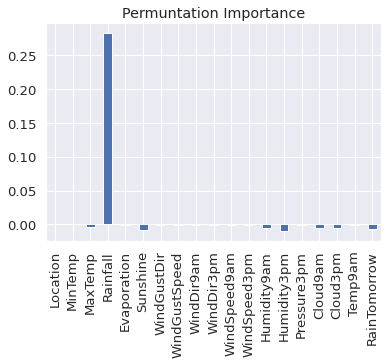

In [80]:
# Visualize feature importance
perm_df = pd.DataFrame(perm_dict, index = [0])
perm_df.T.plot.bar(title = "Permuntation Importance", legend = False);

In [81]:
df_preds.to_csv("./weather-test-predictions.csv", index = False)